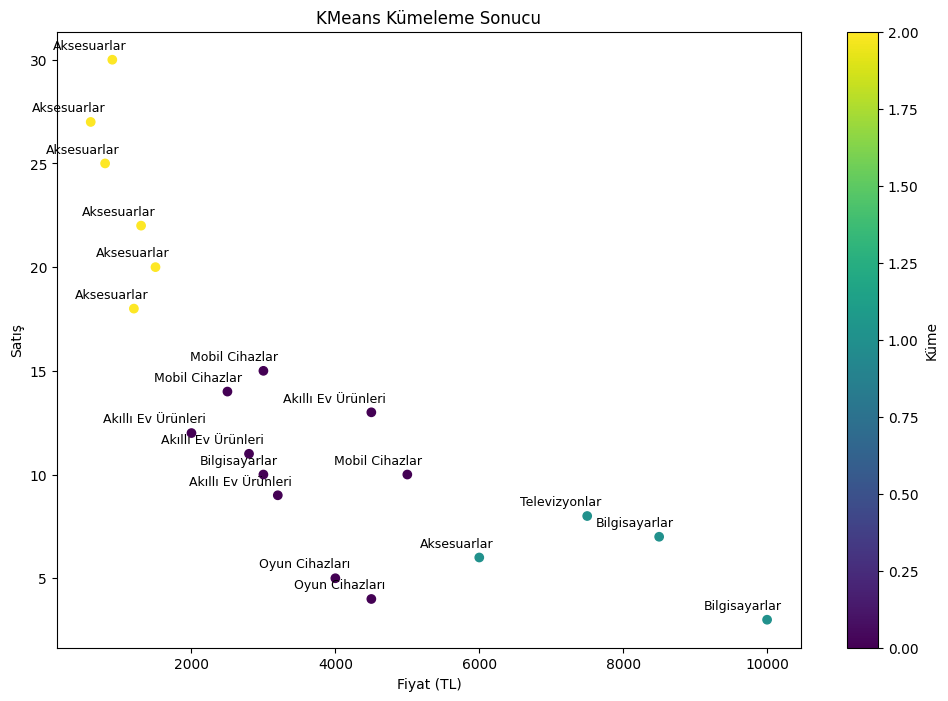

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Veriyi yükle (path senin dosyana göre ayarlandı)
df = pd.read_excel("teknolojik_urunler.xlsx")

# fiyat ve satış sütunlarını seç
X = df[['Fiyat (TL)', 'Satış']]

#Kümelemeyi bu iki sayısal özellik üzerinde yapacağız. (Kategori metin olduğu için modele girmiyor; sadece etikette kullanacağız.)

# veriyi ölçeklendirelim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Kümeleme
kmeans = KMeans(n_clusters=3, random_state=42)
df['Küme'] = kmeans.fit_predict(X_scaled)

# görselleştirme
plt.figure(figsize=(12,8))
plt.scatter(df['Fiyat (TL)'], df['Satış'], c=df['Küme'], cmap='viridis')
plt.xlabel("Fiyat (TL)")
plt.ylabel("Satış")
plt.title("KMeans Kümeleme Sonucu")
plt.colorbar(label="Küme")


# Noktaların yanına kategori isimlerini yazdırma
for i in range(len(df)):
    plt.text(df['Fiyat (TL)'][i] + 200,    # X konumu (biraz sağa kaydırmak için +200 ekledim)
             df['Satış'][i] + 0.5,         # Y konumu (biraz yukarı kaydırmak için +0.5 ekledim)
             df['Kategori'][i],            # Yazılacak metin
             fontsize=9,                   # Yazı boyutu
             ha='right')                   # Yazının hizası (sağa hizalı)

plt.show()



KMeans: verileri gruplara (kümelere) ayıran algoritma.
StandardScaler: özellikleri aynı ölçeğe getirir (z-score). K-Means’te şart; yoksa büyük sayılı sütun (Fiyat) modeli domine eder.

fit → Fiyat ve Satış için ortalama ve standart sapmayı senden öğrenir.
transform → her değeri z-score’a çevirir​

Böylece her sütun “0 ortalama, 1 std sapma” olur. K-Means’in Öklid mesafesi adil çalışır.